In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("../Dataset/RealData.csv")
print(data.head())

                                               tweet
0  @FLYFLEDGLINGFLY Don't try all these shittalks...
1  @tleski @LeijaBecerra @KarinaVinnikova @Fella_...
2  After Russia-Ukraine plan, Musk offers proposa...
3  @essencespurity @bigkumo @ProudSocialist And l...
4  @McFaul “I beat you because I love you. Why do...


In [6]:
print(data.columns)

Index(['tweet'], dtype='object')


In [7]:
data = data[["tweet"]]

In [8]:
data.isnull().sum()

tweet    0
dtype: int64

In [9]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /Users/saad/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


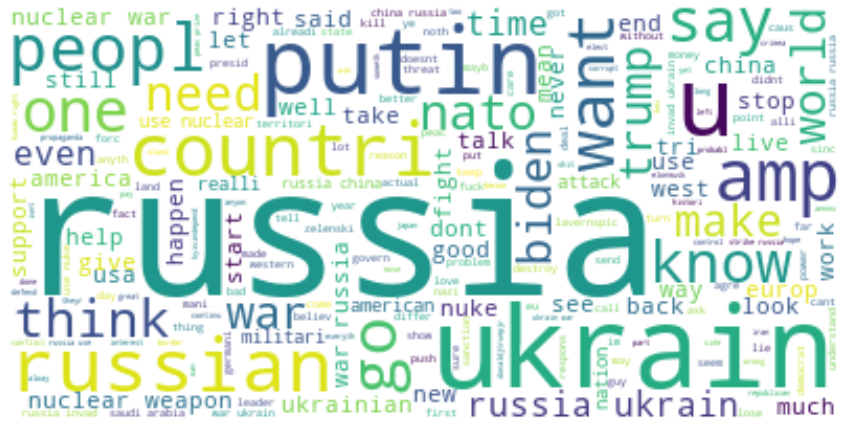

In [10]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["tweet"]]

data = data[["tweet", "Positive", "Negative", "Neutral", "Compound"]]
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/saad/nltk_data...


tweet  Positive  Negative  \
0  flyfledglingfli dont tri shittalk yet hear see...     0.000     0.000   
1  tleski leijabecerra karinavinnikova fellatuga ...     0.000     0.000   
2  russiaukrain plan musk offer propos resolv chi...     0.000     0.204   
3  essencespur bigkumo proudsocialist lose even t...     0.245     0.174   
4              mcfaul “i beat love make this” russia     0.412     0.000   

   Neutral  Compound  
0    1.000    0.0000  
1    1.000    0.0000  
2    0.796   -0.3182  
3    0.581    0.2732  
4    0.588    0.6369

In [12]:
# For Positive = 0 (Anti War) false
# For Negative = 1 (Pro war) true
# For Neutral = 2
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append(0)
    elif i <= -0.05 :
        sentiment.append(1) 
    else:
        sentiment.append(2)
data["Sentiment"] = sentiment
data.head()

tweet  Positive  Negative  \
0  flyfledglingfli dont tri shittalk yet hear see...     0.000     0.000   
1  tleski leijabecerra karinavinnikova fellatuga ...     0.000     0.000   
2  russiaukrain plan musk offer propos resolv chi...     0.000     0.204   
3  essencespur bigkumo proudsocialist lose even t...     0.245     0.174   
4              mcfaul “i beat love make this” russia     0.412     0.000   

   Neutral  Compound  Sentiment  
0    1.000    0.0000          2  
1    1.000    0.0000          2  
2    0.796   -0.3182          1  
3    0.581    0.2732          0  
4    0.588    0.6369          0

In [13]:
data.to_csv('UkrainRussiaData.csv', index=False)

In [14]:
print(data["Sentiment"].value_counts())

1    4254
0    2721
2    1979
Name: Sentiment, dtype: int64


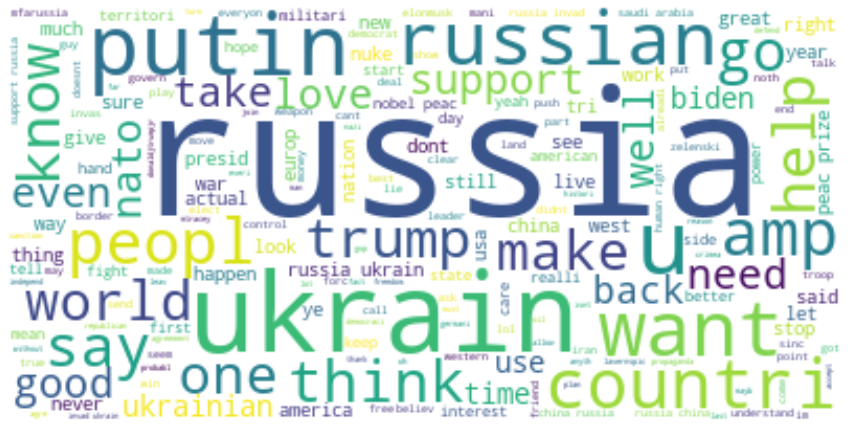

In [15]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

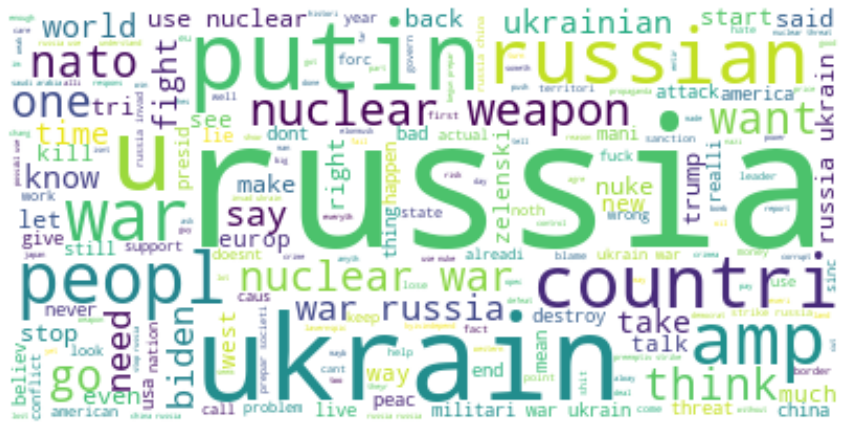

In [16]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()